In [2]:
import pandas as pd
import numpy as np
import time
import sys

import warnings
warnings.simplefilter('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, RMSprop, Adam, Adagrad
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm


In [3]:
food_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/datasets/food_items.csv")

In [4]:
food_df.shape

(13260, 18)

In [5]:
food_df.dtypes

Calories               float64
Total Fat                int64
Saturated Fat          float64
Monounsaturated Fat    float64
Polyunsaturated Fat    float64
Trans Fat              float64
Cholesterol              int64
Sodium                 float64
Total Carbohydrate     float64
Dietary Fiber          float64
Sugars                 float64
Sugar Alcohol            int64
Protein                float64
Vitamin A                int64
Vitamin C                int64
Calcium                  int64
Iron                     int64
class                   object
dtype: object

<Axes: xlabel='class'>

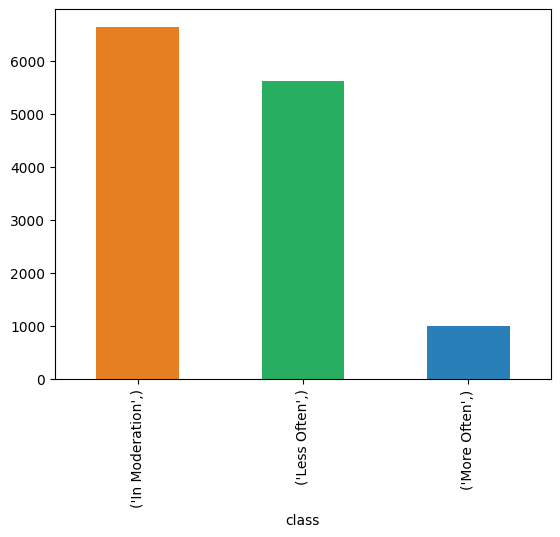

In [6]:
food_df.iloc[:,-1:].value_counts(normalize=True)
food_df.iloc[:,-1:].value_counts().plot.bar(color=['#e67e22', '#27ae60', '#2980b9'])

In [7]:
X_raw=food_df.iloc[:,:-1]
y_raw=food_df.iloc[:,-1:]

In [8]:
#normalizing X
scaler=MinMaxScaler()
X=scaler.fit_transform(X_raw)


In [9]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y_raw.values.ravel())

In [10]:
rs=123

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=y,random_state=rs)
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Training dataset shape, X_train: (10608, 17), y_train: (10608,)
Testing dataset shape, X_test: (2652, 17), y_test: (2652,)


In [12]:
base_ann=MLPClassifier(random_state=rs,hidden_layer_sizes=(32,8), solver='sgd',momentum=0,early_stopping=True,max_iter=100)

In [13]:
def fit_and_score(model, X_train, X_test, y_train, y_test):
    start = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start
    n_iter = model.n_iter_
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    loss_curve = model.loss_curve_
    return round(fit_time, 2), n_iter, train_score, test_score

In [14]:
fit_time, n_iter, train_score, test_score = fit_and_score(base_ann, X_train, X_test, y_train, y_test)

In [15]:
print(f"Training converged after {n_iter} iterations with train score (accuracy) {round(train_score, 2)} \
and test score (accuracy) {round(test_score, 2)}.")

Training converged after 12 iterations with train score (accuracy) 0.42 and test score (accuracy) 0.42.


Our test train accuracy is very low, this maybe due to underfitting so lets train a simple logistic regression model to see how it performs

In [16]:
# Define a logistic regression model with above arguments
lr_model = LogisticRegression(random_state=rs, max_iter = 200)
lr_model.fit(X_train, y_train)
lr_score = lr_model.score(X_test, y_test)
print(f"The test score for the logistic regression is {round(lr_score, 2)}")

The test score for the logistic regression is 0.77


In [17]:
def draw_cost(X, Y, Z, title):
    fig = plt.figure()
    fig.set_size_inches(8, 6, forward=True)
    fig.set_dpi(100)
    ax = plt.axes(projection='3d')
    ax.view_init(30, 35)
    ax.contour3D(X, Y, Z, 100, cmap=plt.cm.coolwarm)
    ax.set_title(title)

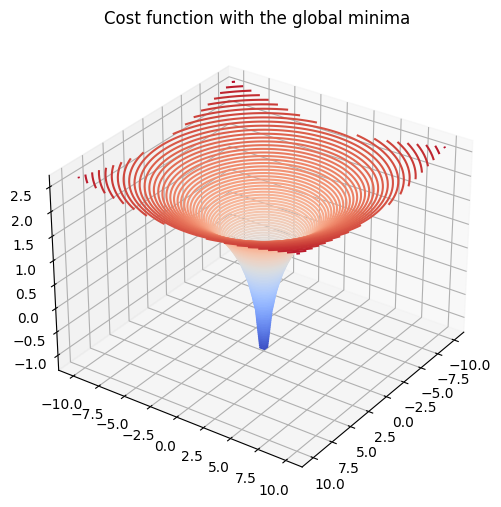

In [18]:
def one_mini_function():
    w1 = np.linspace(-10, 10, 50)
    w2 = np.linspace(-10, 10, 50)
    X, Y = np.meshgrid(w1, w2)
    Z = np.log(np.sqrt(X ** 2 + Y ** 2))
    return X, Y, Z

X, Y, Z = one_mini_function()
draw_cost(X, Y, Z, "Cost function with the global minima")

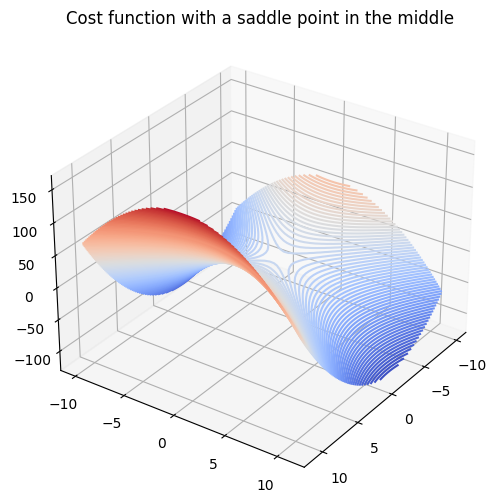

In [19]:
def multi_mini_function():
    w1 = np.linspace(-10, 11, 50)
    w2 = np.linspace(-10, 11, 50)
    X, Y = np.meshgrid(w1, w2)
    Z = X ** 2  - Y ** 2 + 4*X
    return X, Y, Z

X1, Y1, Z1 = multi_mini_function()
draw_cost(X1, Y1, Z1, "Cost function with a saddle point in the middle")

Introducing momentum to retrain our Neural Network Model

In [20]:
momentum_ann = MLPClassifier(random_state=123,  hidden_layer_sizes=(32, 8),
                    solver='sgd', momentum=0.9,
                    early_stopping=True,
                    max_iter=100)
fit_time, n_iter, train_score, test_score = fit_and_score(momentum_ann, X_train, X_test, y_train, y_test)
print(f"Training converged after {n_iter} iterations with test score (accuracy) {round(test_score, 2)}")

Training converged after 93 iterations with test score (accuracy) 0.73


In [21]:
#retraining neural network using Nesterov's momentum
nesterovs_ann=MLPClassifier(random_state=123,hidden_layer_sizes=(32,8),solver='sgd',momentum=0.95,nesterovs_momentum=True,early_stopping=True,max_iter=100)
fit_time,n_iter,train_score,test_score=fit_and_score(nesterovs_ann,X_train,X_test,y_train,y_test)
print(f"Training converged after {n_iter} iterations with score (accuracy) {round(test_score, 2)}")

Training converged after 83 iterations with score (accuracy) 0.74


In [22]:
adam_ann = MLPClassifier(random_state=123,  hidden_layer_sizes=(32, 8),
                    solver='adam',
                    early_stopping=True,
                    max_iter=100)
fit_time, n_iter, train_score, test_score = fit_and_score(adam_ann, X_train, X_test, y_train, y_test)
print(f"Training converged after {n_iter} iterations with score (accuracy) {round(test_score, 2)}")



Training converged after 73 iterations with score (accuracy) 0.84


In [23]:
# cost function
def cost_function(w):
    return (w - 4) ** 2 + 2*w

## take derivative
def grad_function(w):
    return 2*(w-4) + 2

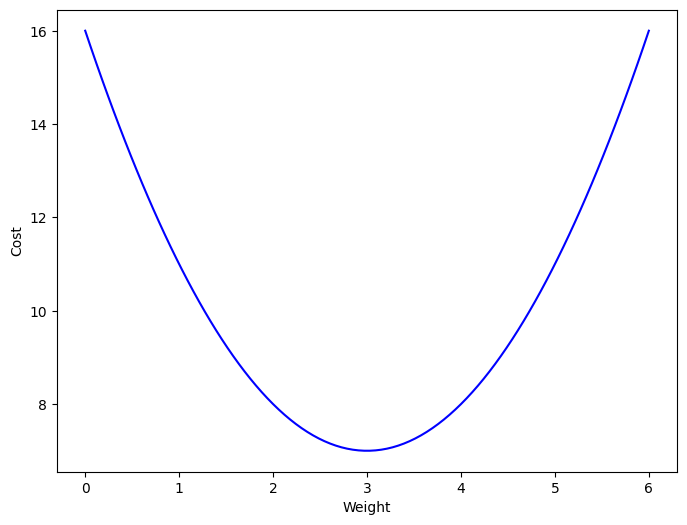

In [24]:
def plot_cost():
    fig, axis = plt.subplots()
    fig.set_size_inches(8, 6, forward=True)
    fig.set_dpi(100)

    x = np.linspace(0,6,100)
    y = cost_function(x)
    axis.plot(x, y, 'b')
    axis.set_xlabel("Weight")
    axis.set_ylabel("Cost")

plot_cost()

In [25]:
def is_converged(w0, w1):
    return abs(w0 - w1) <= 1e-6

# Implement Adam
def adam(t, w, dw, m, v, alpha = 0.1, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8):
    # para
    # First-moment
    m = beta1*m + (1-beta1)*dw
    # Second-moment
    v = beta2*v + (1-beta2)*(dw**2)
    # Bias correction
    m_unbiased = m/(1-beta1**t)
    v_unbiased = v/(1-beta2**t)
    # Update weights
    w = w - alpha*(m_unbiased/(np.sqrt(v_unbiased) + epsilon))
    return w, m, v

In [26]:
w,m,v,t = 0,0,0,1
converged = False
w_his = []
loss_his = []
while not converged:
    dw = grad_function(w)
    w_prev = w
    w, m, v = adam(t, w, dw, m, v)
    loss_his.append(cost_function(w))
    w_his.append(w)
    if is_converged(w, w_prev):
        break
    else:
        t+=1

In [27]:
def plot_cost_w_grad(w_his, loss_his):
    fig, axis = plt.subplots()
    fig.set_size_inches(8, 6, forward=True)
    fig.set_dpi(100)
    x = np.linspace(-2,6,100)
    y = cost_function(x)
    axis.scatter(w_his, loss_his, marker='<', color='r', s=18)
    axis.plot(x, y, 'grey')
    axis.text(0, 16, 'Iteration 0', fontsize=8)
    axis.text(3, 8, f'Iteration {len(loss_his)}', fontsize=8)
    axis.set_xlabel("Weight")
    axis.set_ylabel("Cost")

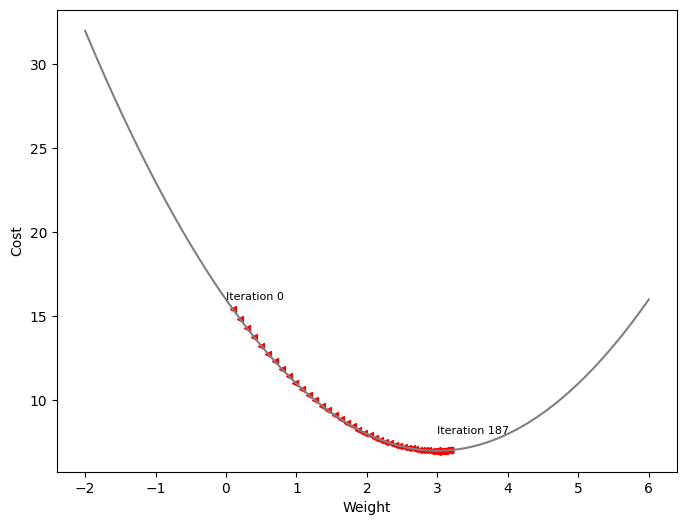

In [28]:
plot_cost_w_grad(w_his, loss_his)

Comparing Optimisation Methods on Fasion MNIST


In [29]:
NAMES=['SGD','SGD_momentum','Adam']

In [31]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()

In [32]:
xtrain=np.reshape(xtrain,(len(xtrain),-1))
xtest=np.reshape(xtest,(len(xtest),-1))
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)

In [34]:
#normalization
xtrain=np.apply_along_axis(lambda x:x/255,1,xtrain)
xtest=np.apply_along_axis(lambda x:x/255,1,xtest)
#validation set
index=50000
xval,yval=xtrain[index:],ytrain[index:]
xtrain,ytrain=xtrain[:index],ytrain[:index]
xtrain.shape,xval.shape,xtest.shape


((50000, 784), (0, 784), (10000, 784))

In [35]:
#sequential neural network model
model=Sequential([Dense(128,input_shape=xtrain.shape[1:],activation='relu',name='dense_1'),Dense(64,activation='relu',name='dense_2'),Dropout(0.2),Dense(10,activation='softmax',name='dense_3')],name='Sequential')
model.build(input_shape=xtrain.shape[1:])
model.summary()

Model: "Sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [38]:
# params
epochs = 10
batch_size = 64
shuffle = True

# dicts for storing results
loss      = {opt:[] for opt in NAMES}
val_loss  = {opt:[] for opt in NAMES}
acc       = {opt:[] for opt in NAMES}
val_acc   = {opt:[] for opt in NAMES}
test_acc  = {}
test_loss = {}


In [41]:
weights = model.get_weights().copy()

with tqdm(desc='Training', total=len(NAMES*epochs)) as pbar:
    for name in NAMES:
        optimizer=''

        # prepare model
        model.set_weights(weights)
        if name == 'SGD':
            optimizer= SGD(lr=0.001)
        elif name=='SGD_momentum':
            optimizer=SGD(lr=0.001, momentum=0.9)
        elif name=='Adam':
            optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
        print('Optimizer: ', name)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])

        # train model
        for epoch in range(epochs):
            his = model.fit(xtrain, ytrain,
                            epochs=1,
                            batch_size=batch_size,
                            validation_data=(xval, yval),
                            shuffle=shuffle,
                            verbose=0)

            # update dictionaries
            loss[name].append(his.history['loss'][0])
            if 'val_loss' in his.history:
              val_loss[name].append(his.history['val_loss'][0])
            acc[name].append(his.history['acc'][0])
            if 'val_acc' in his.history:
              val_acc[name].append(his.history['val_acc'][0])
            pbar.update(1)

        # inference
        t_loss, t_acc = model.evaluate(xtest, ytest, verbose=0)
        test_loss[name] = t_loss
        test_acc[name] = t_acc

Training:   0%|          | 0/30 [00:00<?, ?it/s]

Optimizer:  SGD
Optimizer:  SGD_momentum
Optimizer:  Adam


Visualization


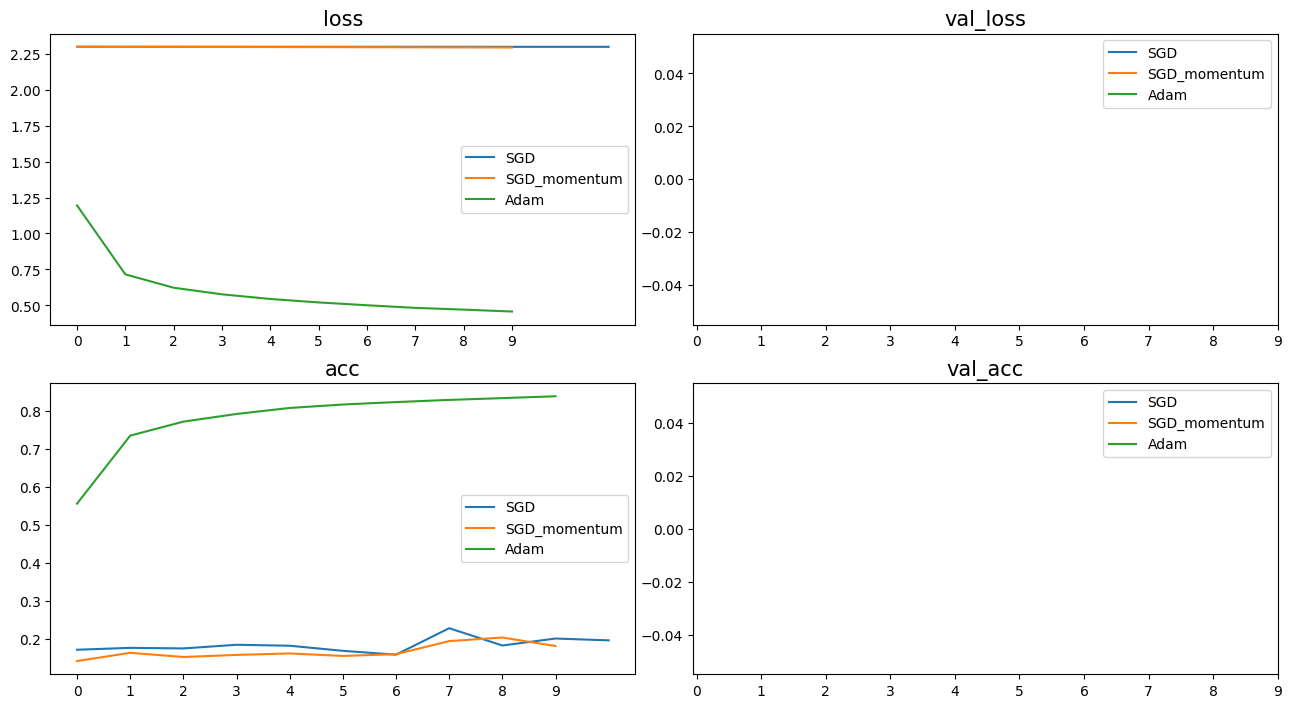

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(13, 7))
plt.tight_layout()
plt.subplots_adjust(hspace=0.2)


for index, result, title in zip([[0, 0], [0, 1], [1, 0], [1, 1]],
                                [loss, val_loss, acc, val_acc],
                                ['loss', 'val_loss', 'acc', 'val_acc']):
    i, j = index
    for name, values in result.items():
        axs[i, j].plot(values, label=name)
        axs[i, j].set_title(title, size=15)
        axs[i, j].set_xticks([e for e in range(epochs)])
        axs[i, j].legend(loc="best", prop={'size': 10})

As seen above, SGD with momentum outperforms SGD without momentum. In this case, Adam performs the best. In fact, it works well in most cases so it often set to be the default optimizer for many neural network models.

Let us look at a few images from our test dataset and see how our model classifies them.

313/313 [==============================] - 1s 2ms/step


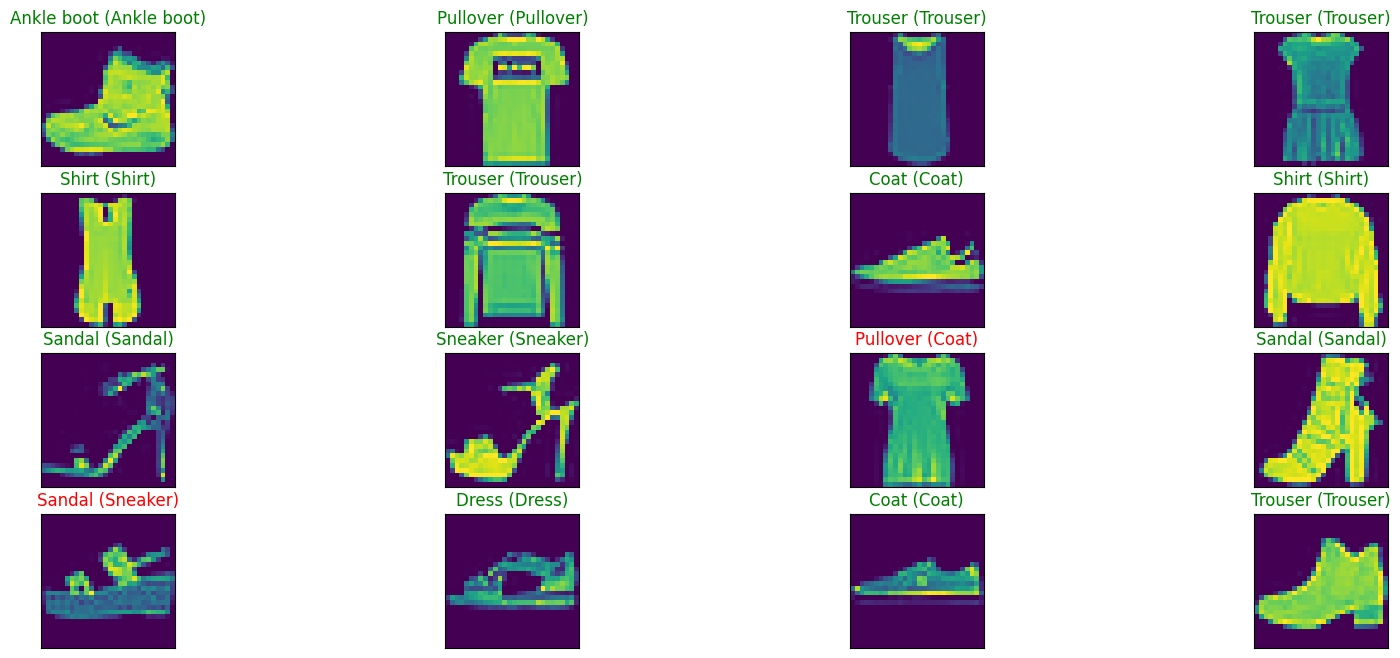

In [43]:
w, h = 28, 28
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

y_hat = model.predict(xtest)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(range(16)):

    ax = figure.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(xtrain.reshape(xtrain.shape[0], w, h, 1)[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(ytest[index])
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
